## New preprocessing and tokenization

Let's check out the length of this

In [ ]:
%load_ext autoreload
%autoreload 2

from hatedetection import load_datasets

train_dataset, dev_dataset, test_dataset = load_datasets()

In [2]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("../../models/beto-finetuned-context/")

In [3]:
def tokenize(batch):
    return tokenizer(batch['context'], batch['text'], truncation=False)

train_dataset = train_dataset.map(tokenize, batched=True, batch_size=64)

Token indices sequence length is longer than the specified maximum sequence length for this model (557 > 512). Running this sequence through the model will result in indexing errors


(array([4.6100e+02, 6.1310e+03, 1.1312e+04, 8.3580e+03, 4.4670e+03,
        2.4110e+03, 1.5750e+03, 1.0570e+03, 4.8700e+02, 9.9000e+01,
        1.7000e+01, 1.3000e+01, 1.0000e+01, 6.0000e+00, 2.0000e+00,
        4.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 11.  ,  21.92,  32.84,  43.76,  54.68,  65.6 ,  76.52,  87.44,
         98.36, 109.28, 120.2 , 131.12, 142.04, 152.96, 163.88, 174.8 ,
        185.72, 196.64, 207.56, 218.48, 229.4 , 240.32, 251.24, 262.16,
        273.08, 284.  , 294.92, 305.84, 316.76, 327.68, 338.6 , 349.52,
        360.44, 371.36, 382.28

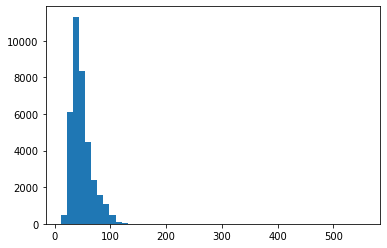

In [12]:
import numpy as np
from matplotlib import pyplot as plt

lens = np.array([sum(l) for l in train_dataset["attention_mask"]])
plt.hist(lens, bins=50)

In [38]:
emoji_idx = tokenizer.get_vocab()["[EMOJI]"]

for ex in train_dataset.select(range(30)):
    if emoji_idx in ex["input_ids"]:
        dec = tokenizer.decode(ex["input_ids"])
        print(dec)

[CLS] coronavirus en ar gent ina : ginés gonzález garcía confirmó que llegarán médicos cu bano s al país [SEP] [USER] [EMOJI] cara resoplando [EMOJI] sos un desastre j. j. j [SEP]
[CLS] su estado de salud, literatura y feminismo : 19 definicion es de florencia kirchner [SEP] [USER] pobrecita, con 4p alos verdes, está triste?? [EMOJI] mano con señal de victoria tono de piel claro medio [EMOJI] [EMOJI] mano con señal de victoria tono de piel claro medio [EMOJI] [EMOJI] mano con señal de victoria tono de piel claro medio [EMOJI] [SEP]
